In [1]:
import sympy as sp
from sympy.physics.quantum import Bra, Ket
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.gate import HadamardGate,CNotGate, IdentityGate
from sympy.physics.quantum.qapply import qapply
from sympy import eye
from sympy import Abs
from sympy import sqrt
from UnitaryFunction import buildUnitaryMatrix, buildUnitaryMatrixFromSimonFunction, format_matrice
sp.init_printing()

In [55]:
#definition des états
ket0 = Matrix([1,0])
ket1 = Matrix([0,1])
plus = Matrix([1/sqrt(2),1/sqrt(2)])
minus = Matrix([1/sqrt(2),-1/sqrt(2)])

α = sp.Symbol("α")
β = sp.Symbol("β")
ϕ = α * ket0 + β * ket1 # Matrix([α,β])

α1 = sp.Symbol("α1", complex=True)
β1 = sp.Symbol("β1", complex=True)
ψ1 = α1 * ket0 + β1 * ket1 # Matrix([α,β])

α2 = sp.Symbol("α2", complex=True)
β2 = sp.Symbol("β2", complex=True)
ψ2 = α2 * ket0 + β2 * ket1 # Matrix([α,β])

α3 = sp.Symbol("α3", complex=True)
β3 = sp.Symbol("β3", complex=True)
ψ3 = α3 * ket0 + β3 * ket1 # Matrix([α,β])

α4 = sp.Symbol("α4", complex=True)
β4 = sp.Symbol("β4", complex=True)
ψ4 = α4 * ket0 + β4 * ket1 # Matrix([α,β])

α5 = sp.Symbol("α5", complex=True)
β5 = sp.Symbol("β5", complex=True)
ψ5 = α5 * ket0 + β5 * ket1 # Matrix([α,β])

α6 = sp.Symbol("α6", complex=True)
β6 = sp.Symbol("β6", complex=True)
ψ6 = α6 * ket0 + β6 * ket1 # Matrix([α,β])

In [3]:
I=sp.eye(2)
π=sp.pi
i=sp.I
X=sp.Matrix([[0,1], [1,0]]) #Pauli
σx=X
Y=sp.Matrix([[0,-i], [i,0]])
Z=sp.Matrix([[1,0], [0,-1]])

H=sp.Matrix([[1/sp.sqrt(2),1/sp.sqrt(2)], [1/sp.sqrt(2),-1/sp.sqrt(2)]])

S=sp.Matrix([[1,0], [0,-i]])
T=sp.Matrix([[1,0], [0,sp.exp(-i*π/4)]])


# rotation by theta around y
def Ry(θ):
    return sp.Matrix([[sp.cos(θ/2),sp.sin(θ/2)], [-sp.sin(θ/2),sp.cos(θ/2)]])

# rotation by alpha around z
def Rz(α):
    return sp.Matrix([[sp.exp(i*α/2),0], [0,sp.exp(-i*α/2)]]) 

# Phase Shift with respect to delta
def Ph(δ):
    return sp.Matrix([[sp.exp(i*δ),0], [0,sp.exp(i*δ)]]) 

# Operation on two Qubits

SWAP = sp.Matrix ([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
CNOT = TensorProduct(I,ket0*ket0.T) + TensorProduct(X, ket1*ket1.T) # second qubit is the control

In [4]:
M=TensorProduct(H, H, H) #/(sp.sqrt(2)/4)
M.rank()

In [5]:
M.det()

In [6]:
table1={
    "000": "10011",
    "001": "00101",    
    "010": "00101",    
    "011": "10011",    
    "100": "11010",
    "101": "00001",
    "110": "00001",
    "111": "11010",
       } # s = 011
table2={
    "000": "011",
    "001": "101",    
    "010": "000",    
    "011": "010",    
    "100": "101",
    "101": "011",
    "110": "010",
    "111": "000",
} # s = 101



In [58]:
TensorProduct(I, I, I, H, H, H) * TensorProduct(ψ1, ψ2, ψ3, ψ4, ψ5, ψ6)

⎡√2⋅α₁⋅α₂⋅α₃⋅α₄⋅α₅⋅α₆   √2⋅α₁⋅α₂⋅α₃⋅α₄⋅α₅⋅β₆   √2⋅α₁⋅α₂⋅α₃⋅α₄⋅α₆⋅β₅   √2⋅α₁⋅α₂
⎢──────────────────── + ──────────────────── + ──────────────────── + ────────
⎢         4                      4                      4                     
⎢                                                                             
⎢√2⋅α₁⋅α₂⋅α₃⋅α₄⋅α₅⋅α₆   √2⋅α₁⋅α₂⋅α₃⋅α₄⋅α₅⋅β₆   √2⋅α₁⋅α₂⋅α₃⋅α₄⋅α₆⋅β₅   √2⋅α₁⋅α₂
⎢──────────────────── - ──────────────────── + ──────────────────── - ────────
⎢         4                      4                      4                     
⎢                                                                             
⎢√2⋅α₁⋅α₂⋅α₃⋅α₄⋅α₅⋅α₆   √2⋅α₁⋅α₂⋅α₃⋅α₄⋅α₅⋅β₆   √2⋅α₁⋅α₂⋅α₃⋅α₄⋅α₆⋅β₅   √2⋅α₁⋅α₂
⎢──────────────────── + ──────────────────── - ──────────────────── - ────────
⎢         4                      4                      4                     
⎢                                                                             
⎢√2⋅α₁⋅α₂⋅α₃⋅α₄⋅α₅⋅α₆   √2⋅α₁⋅α₂⋅α₃⋅α₄⋅α₅⋅β₆   √2⋅α₁

In [8]:
def uneFonction2x2(param1, param2):
    table1={
        "00": "11",
        "01": "00",    
        "10": "11",    
        "11": "00",    
    } # s = 10
    table2={
        "00": "01",
        "01": "10",    
        "10": "01",    
        "11": "10",    
    } # s = 10
    # Convertir les paramètres booléens en une chaîne de caractères
    key = f"{int(param1)}{int(param2)}"

    # Obtenir la valeur correspondante dans le dictionnaire
    value = table1.get(key, "")

    # Convertir la valeur en un tableau de booléens
    result = [char == '1' for char in value]

    return result

def uneFonction3x3(param1, param2, param3):
    table2={
        "000": "011",
        "001": "101",    
        "010": "000",    
        "011": "010",    
        "100": "101",
        "101": "011",
        "110": "010",
        "111": "000",
    } # s = 101
    # Convertir les paramètres booléens en une chaîne de caractères
    key = f"{int(param1)}{int(param2)}{int(param3)}"

    # Obtenir la valeur correspondante dans le dictionnaire
    value = table2.get(key, "")

    # Convertir la valeur en un tableau de booléens
    result = [char == '1' for char in value]

    return result

def uneFonction3x4(param1, param2, param3):
    table34={
        "000": "10011",
        "001": "00101",    
        "010": "00101",    
        "011": "10011",    
        "100": "11010",
        "101": "00001",
        "110": "00001",
        "111": "11010",
    } # s = 101
    # Convertir les paramètres booléens en une chaîne de caractères
    key = f"{int(param1)}{int(param2)}{int(param3)}"

    # Obtenir la valeur correspondante dans le dictionnaire
    value = table34.get(key, "")

    # Convertir la valeur en un tableau de booléens
    result = [char == '1' for char in value]

    return result



In [9]:
Uf=buildUnitaryMatrixFromSimonFunction(uneFonction2x2)
print (format_matrice(Uf))


Uf =
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1


In [10]:
Uf.rank()

In [11]:
sp.shape(Uf)

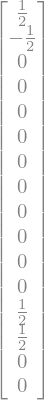

In [13]:

(TensorProduct(I, I, H, H)*Uf*TensorProduct(I, I, H, H) * TensorProduct(ψ1, ψ2, ψ3, ψ4)).subs({α1:1, β1:0, α2:1, β2:0, α3:1, β3:0, α4:1, β4:0})

In [44]:
from sympy.physics.quantum.dagger import Dagger

In [45]:
def measureAmongst2(idx, vect):
    if (idx==1) : projection = Dagger(TensorProduct(Matrix([1, 1]), I))
    if (idx==2) : projection = Dagger(TensorProduct(I, Matrix([1, 1])))
    M=projection*sp.Abs(vect)
    return sp.simplify((1/M.norm())*(M))

In [46]:
def measureAmongst4(idx, vect):
    if (idx==1) : projection = Dagger(TensorProduct(Matrix([1, 1]), I, I, I))
    if (idx==2) : projection = Dagger(TensorProduct(I, Matrix([1, 1], I, I)))
    if (idx==3) : projection = Dagger(TensorProduct(I, I, Matrix([1, 1], I)))
    if (idx==4) : projection = Dagger(TensorProduct(I, I, I, Matrix([1, 1])))
    M=projection*sp.Abs(vect)
    return sp.simplify((1/M.norm())*(M))

In [50]:
def isolateQubits(idx_start, idx_end, vector):
    """ renvoie une matrice permettant d'isoler des qubits [idx_start .. idx_end] dans vector.
    Les qubits sont numérotés du bas vers le haut.
    idx_end > idx_start et idx_end <= len(vector)
    """
    len(vector)/2
    if idx_start != 0:
        res = TensorProduct(Matrix([1, 1]))
        for idx in range (1, idx_start):
            res = TensorProduct(res, Matrix([1, 1]))
        for idx in range(idx_start, idx_end+1):
            res = TensorProduct(res, I)
    projection = Dagger(res)
    M=projection*sp.Abs(vector)
    return sp.simplify((1/M.norm())*(M))


In [51]:
vect = TensorProduct(I, I, H, H)*Uf*TensorProduct(I, I, H, H) * TensorProduct(ψ1, ψ2, ψ3, ψ4)
    
# projection = Dagger(TensorProduct(Matrix([1, 1]), Matrix([1, 1]), I, I))
# M2=projection*sp.Abs(vect)
# R2 = sp.simplify((1/M2.norm())*(M2))# .subs({α1:1, β1:0, α2:1, β2:0, α3:1, β3:0, α4:1, β4:0})
# R2


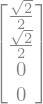

In [54]:
R1= isolateQubits(2, 3, vect)
R1.subs({α1:1, β1:0, α2:1, β2:0, α3:1, β3:0, α4:1, β4:0})

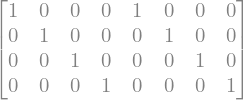

In [16]:
sp.Matrix([[ 1, 0, 0, 0, 1, 0, 0, 0],
        [ 0, 1, 0, 0, 0, 1, 0, 0],
        [ 0, 0, 1, 0, 0, 0, 1, 0],
        [ 0, 0, 0, 1, 0, 0, 0, 1]])

In [18]:
M1=TensorProduct(Matrix([1, 1]), Matrix([1, 1]), I, I)

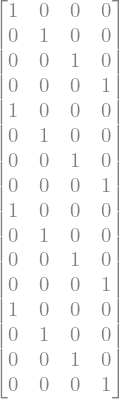

In [19]:
M1

In [29]:
M2=TensorProduct(TensorProduct(TensorProduct(Matrix([1, 1]), Matrix([1, 1])), I), I)

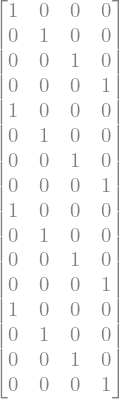

In [30]:
M2

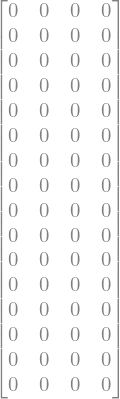

In [31]:
M2-M1